In [ ]:
#Load the Drive helper and mount
from google.colab import drive#

# This will prompt for authorization.
#drive.mount('/content/drive/')
drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


In [ ]:
#set up paths
text_path = "/content/drive/MyDrive/Colab Notebooks/AIGriffis/data"
# Define the path to your text file
input_file = text_path + "/griffis_diary_by_day.txt"
output_file = text_path + "/out/sentiment_scores.txt"
output_image = text_path + "/out/sentiment.png"


In [ ]:
# load libraries for text analysis
from glob import glob
import os

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

#for natural language processing
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from nltk.chunk import ne_chunk
from nltk.util import ngrams
from nltk.corpus import stopwords

import string
from collections import Counter

# Load a spaCy model
!pip -q install spacy
!python -m spacy download en_core_web_sm
import spacy
from collections import defaultdict
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2024-01-29 17:27:24.843112: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 17:27:24.843181: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 17:27:24.844968: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 17:27:26.290043: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)


In [ ]:
#sentiment analysis of text file
def analyze_sentiment(counter,nscore,text):
    #def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    nscore = sentiment_scores['compound']

    if False:
      if sentiment_scores['compound'] > 0.05:
        return ( counter, nscore, 'Positive')
      elif sentiment_scores['compound'] < -0.05:
        return ( counter, nscore, 'Negative' )
    else:
          #return ( counter, nscore, 'Neutral' )
          return ( counter, nscore*10)

# Initialize empty lists to store the text file and sentiment of each line
lines = []
tsentiments = []

#lines = " "
nlines = 1200 # arbitrary guess of file length
nsentiment = 0
# Open the file in 'r' mode (read mode)
with open(input_file , 'r') as file:
    # Read the specified number of lines
    for i in range(nlines):
        line = file.readline()
        #tsentiments.append(analyze_sentiment(line,nsentiment))
       #print(analyze_sentiment(line,nsentiment))
        if not line:
            break  # Exit the loop if we reach the end of the file
        lines.append(line.strip())  # Remove leading/trailing whitespace and add the line to the list
         #tsentiments.append(analyze_sentiment(line,nsentiment))
        tsentiments.append(analyze_sentiment(i,nsentiment,line))

        #for charting purposes, ignoring text label, only using score
        # Close the file automatically when exiting the 'with' block


# Open the file in write mode and write the list elements
with open(output_file, "w") as file:
    for item in tsentiments:
        file.write(str(item) + "\n")

print(f"List saved to {output_file}")


List saved to /content/drive/MyDrive/Colab Notebooks/AIGriffis/data/out/sentiment_scores.txt


Graph saved to /content/drive/MyDrive/Colab Notebooks/AIGriffis/data/out/sentiment.png


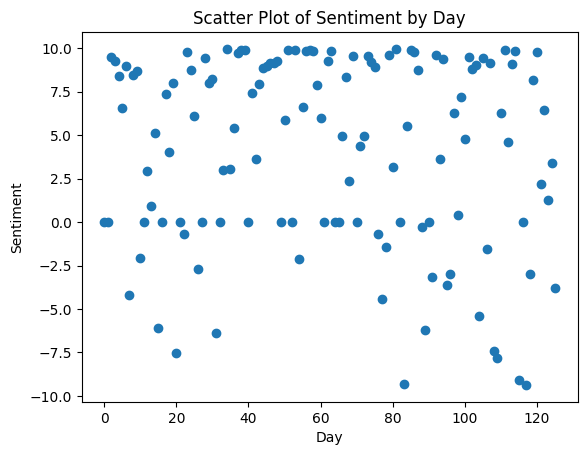

In [23]:
#map sentiments
# Unzip the data into separate x and y lists
x_values, y_values = zip(*tsentiments)

# Create a scatter plot
plt.scatter(x_values, y_values)

# Set labels for the axes
# Adding labels and title
plt.xlabel('Day')
plt.ylabel('Sentiment')
# Set a title for the plot
plt.title('Scatter Plot of Sentiment by Day')

# Save to a file
plt.savefig(output_image)

print(f"Graph saved to {output_image}")
# Show the plot
plt.show()